### Introduction:

Our impact factor considers four main characteristics to minimize bias and maximize statistical accuracy. The pass characteristics we examined are openness, the type of pass, possession (based on the outcome of the pass), and expected threat based on the origin and destination zone of the pass. More reasoning behind our methodology will be provided in section 5. 

Fundamentally, passing has two primary functions in soccer.
- Maintaining possession of the ball. 
- Generating scoring opportunities.

The four factors we have chosen to emphasize for calculating our impact factors ensure we evaluate both aspects of the passing game. If, for instance, all of our factors were biased towards exclusively (a) or exclusively (b), the resulting impact factor would not be an excellent indicator of the overall passing of a player and/or team. Our method evaluates two factors that favor objective (a) (Possession and Openness) and two factors that favor objective (b) (Type of pass and Generated Expected Threat). This improves upon the initial impact factor method presented in class by considering more data in the provided set, such that it encompasses all elements in the overall passing game. The resulting impact factor of any given pass will be the sum of its possession value and attacking value.

 - Revised Weighted Sum=(1-wi)[1- exp(-(xp+xr)2)]+wi1-0.8 exp(-2) 
        - wi= weight associated with pass type.  for progressive (0.6), neutral (0.5), and defensive (0.4).
        - xp+xr= The sum of all  nearby opponents near the passer (xp) and recipient (xr).
        - =1/(1+y), where y = possession outcome score . Refer to section 4.3 
        mu = xTpass(speedpass/AvgSpeedi), where AvgSpeedi= Average speed of the pass' type


In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)

import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns 
import matplotsoccer as mps
import warnings
warnings.filterwarnings('ignore')

In [2]:
import Metrica_IO as mio
import Metrica_Viz as mviz

In [3]:
# gather match 1 and 2 data
DATADIR = "C:\\Users\\Michael\Documents\\MACF courses material\\Fall 2022\\STAT 497\\Project1-master\\sample-data-master\\sample-data-master\\data"
game_id = 2 # let's look at sample match 2
# set up initial path to data
events = mio.read_event_data(r"C:\Users\Michael\Documents\MACF courses material\Fall 2022\STAT 497\Project1-master\sample-data-master\sample-data-master\data", game_id)

#game_id =  1 # match 1
#events = mio.read_event_data(r"C:\Users\Michael\Documents\MACF courses material\Fall 2022\STAT 497\Project1-master\sample-data-master\sample-data-master\data", game_id)
#events[events['Type']=='SET PIECE']

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
11,Away,SET PIECE,THROW IN,1,672,26.88,672,26.88,Player15,NaN,NaN,NaN,NaN,NaN
111,Home,SET PIECE,THROW IN,1,6354,254.16,6354,254.16,Player1,NaN,NaN,NaN,NaN,NaN
129,Home,SET PIECE,FREE KICK,1,8148,325.92,8148,325.92,Player6,NaN,NaN,NaN,NaN,NaN
140,Home,SET PIECE,THROW IN,1,8720,348.80,8720,348.80,Player4,NaN,NaN,NaN,NaN,NaN
167,Home,SET PIECE,CORNER KICK,1,10463,418.52,10463,418.52,Player5,NaN,NaN,NaN,NaN,NaN
171,Home,SET PIECE,THROW IN,1,10715,428.60,10715,428.60,Player4,NaN,NaN,NaN,NaN,NaN
199,Away,SET PIECE,KICK OFF,1,13801,552.04,13801,552.04,Player24,NaN,NaN,NaN,NaN,NaN
216,Home,SET PIECE,THROW IN,1,14844,593.76,14844,593.76,Player4,NaN,NaN,NaN,NaN,NaN
228,Away,SET PIECE,THROW IN,1,15449,617.96,15449,617.96,Player18,NaN,NaN,NaN,NaN,NaN


In [4]:
game_id2 = 2
events2 = mio.read_event_data(r"C:\Users\Michael\Documents\MACF courses material\Fall 2022\STAT 497\Project1-master\sample-data-master\sample-data-master\data", game_id2)
#events2[events2['Type']=='SET PIECE']

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
11,Away,SET PIECE,THROW IN,1,672,26.88,672,26.88,Player15,NaN,NaN,NaN,NaN,NaN
111,Home,SET PIECE,THROW IN,1,6354,254.16,6354,254.16,Player1,NaN,NaN,NaN,NaN,NaN
129,Home,SET PIECE,FREE KICK,1,8148,325.92,8148,325.92,Player6,NaN,NaN,NaN,NaN,NaN
140,Home,SET PIECE,THROW IN,1,8720,348.80,8720,348.80,Player4,NaN,NaN,NaN,NaN,NaN
167,Home,SET PIECE,CORNER KICK,1,10463,418.52,10463,418.52,Player5,NaN,NaN,NaN,NaN,NaN
171,Home,SET PIECE,THROW IN,1,10715,428.60,10715,428.60,Player4,NaN,NaN,NaN,NaN,NaN
199,Away,SET PIECE,KICK OFF,1,13801,552.04,13801,552.04,Player24,NaN,NaN,NaN,NaN,NaN
216,Home,SET PIECE,THROW IN,1,14844,593.76,14844,593.76,Player4,NaN,NaN,NaN,NaN,NaN
228,Away,SET PIECE,THROW IN,1,15449,617.96,15449,617.96,Player18,NaN,NaN,NaN,NaN,NaN


In [5]:
#Data cleaning
# Bit of housekeeping: unit conversion from metric data units to meters
events = mio.to_metric_coordinates(events)
events.head()


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44


In [6]:
passes = events.loc[events["Type"]=="PASS"]
passes["Subtype"] = passes["Subtype"].fillna("Normal")

passes["Subtype"].unique()

#passes = passes.reset_index()
#array([nan, 'HEAD', 'CROSS', 'DEEP BALL', 'GOAL KICK',
#      'HEAD-INTERCEPTION-CLEARANCE'], dtype=object)

array(['Normal', 'HEAD', 'CROSS', 'DEEP BALL', 'GOAL KICK',
       'HEAD-INTERCEPTION-CLEARANCE'], dtype=object)

In [7]:
# Get events by team
home_events = events[events['Team']=='Home']
away_events = events[events['Team']=='Away']

# Frequency of each event type by team
home_events['Type'].value_counts()

away_events['Type'].value_counts()

PASS              421
CHALLENGE         151
BALL LOST         113
RECOVERY          113
SET PIECE          46
BALL OUT           22
SHOT               11
FAULT RECEIVED     11
CARD                3
Name: Type, dtype: int64

In [8]:
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

# Convert positions from metrica units to meters 
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

# # plot player positions at ,atckick-off
# KO_Frame = events.loc[0]['Start Frame']
# fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] )

Reading team: home
Reading team: away


In [9]:
#home keeper #11 
#away keeper #25 
#KO_Frame = events.loc[0]['Start Frame']
#tracking_home.loc[KO_Frame]

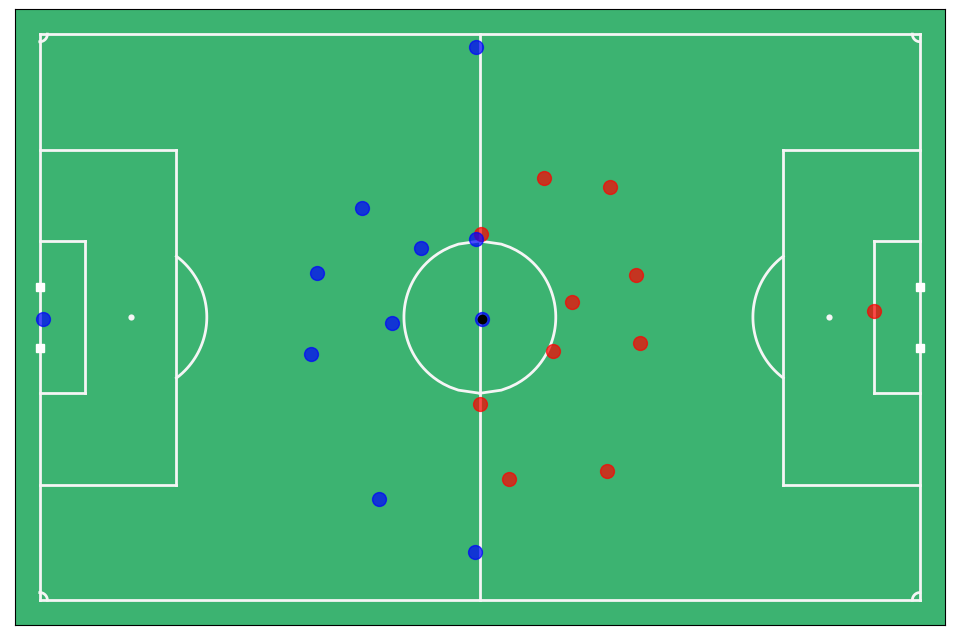

In [10]:
# # plot player positions at ,atckick-off
KO_Frame = events.loc[0]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] , )

### Factor #1. Openness

In order to evaluate the openness of passes, we look at the pressure generated from the opposing team to the player who is passing the ball, as well as the recipient of the pass. Pressure is computed using two measurements. 

 - The closest opponent to the passer and recipient is considered in meters. Passing to a teammate who is facing minimal pressure will increase the possession value of a pass. The value can also increase if the player who completes the pass can do so while facing heavy defensive pressure. 
                                                            
 - The total number of opposing players around both the passer and receiver within a radius of 10 meters. The possession value score increases logarithmically as the number of opponents surrounding the pass increases. 



In [11]:

temp = tracking_home.merge(tracking_away, on = ['Period', 'Time [s]', 'Frame'], how ="left")

# count the nbr of opp. players within 10m radius
nbr_ply_vector = []
nbr_ply_vector2 =[]
distance_vector = []
#map tracking to event data
for i, row in passes.iterrows():
    #passer
    passer_name =''
    passer_nbr = row['From'].split('Player', 1)
    passer_name = row['Team'] + '_' + passer_nbr[1].replace(" ", "")
    
    #receiver
    receiver_name =''
    receiver_nbr = row['To'].split('Player', 1)
    receiver_name = row['Team'] + '_' + receiver_nbr[1].replace(" ", "")
    if row['Team'] == 'Away':
        opp_team = temp.loc[row["Start Frame"]].filter(like='Home')
        
        opp_team_end = temp.loc[row["End Frame"]].filter(like='Home')
        
    else:
        opp_team = temp.loc[row["Start Frame"]].filter(like='Away')
        
        opp_team_end = temp.loc[row["End Frame"]].filter(like='Away')
    
    i=0
    count_ply_near_r =0
    count_ply_near_p =0
    min_distance_1 = 106
    min_distance_2 = 106
    for i in range(int(len(opp_team)/2)): #determine closest opp. player 
        passer = temp.loc[row["Start Frame"]][[passer_name + '_x', passer_name + '_y']]
        distance_1 = np.linalg.norm(passer.values - opp_team[[i, i+1]].values)
        min_distance_1 = min(min_distance_1, distance_1) # take the closest opponent player
        
        if (distance_1 < 10) :
            count_ply_near_r +=1
        receiver = temp.loc[row["End Frame"]][[receiver_name + '_x', receiver_name + '_y']]
        distance_2 = np.linalg.norm(receiver.values - opp_team_end[[i, i+1]].values)
        min_distance_2 = min(min_distance_2, distance_2) # take the closest opponent player
        
        if (distance_2  < 10):
            count_ply_near_p +=1
            
        temp_vect = [min_distance_1, min_distance_2] 
        count_ply_nearby = [count_ply_near_p, count_ply_near_r] 
        count_ply_nearby_total = count_ply_near_p+ count_ply_near_r
        i+=1
    
    distance_vector.append(temp_vect)
   
    nbr_ply_vector.append(count_ply_nearby)
    nbr_ply_vector2.append(count_ply_nearby_total)    

passes['nbr_nerby_ply'] = nbr_ply_vector
passes['total_nbr_nerby_ply'] = nbr_ply_vector2
passes['closest_opponent'] = distance_vector



### Factor #2: Detect type of passes

- Progressive: Passes in the attacking 60% of the pitch that travel 25% closer to the goal from the starting pass point. 
- Neutral: Passes in the attacking 60% of the pitch that travel between 0% to 25% closer to the goal from the starting pass 
- Defensive: Passes that are neither progressive nor neutral. 

The sequence of passes is given a score based on the result of the play. 
 - If a series leads to a goal/shot, then its corresponding score will be 1. 
 - If a series leads to a corner, free kick, or throw-in (the team with the ball must maintain possession), then its corresponding score will be 0.5.
 - If a series leads to a lost possession, then its corresponding score will be 0.1.

In [12]:

# Detect all the progressive passes
beg_away = np.sqrt(np.square(53-passes['Start X']) + np.square(0 - passes['Start Y']))
end_away = np.sqrt(np.square(53 - passes['End X']) + np.square(0 - passes['End Y']))

beg_home = np.sqrt(np.square(-53-passes['Start X']) + np.square(0 - passes['Start Y']))
end_home = np.sqrt(np.square(-53 - passes['End X']) + np.square(0 - passes['End Y']))

condition = (
    # more than 25% closer to goal

    # within the attacking area
    (
     ((end_away / beg_away < .75) & (passes['End X']> -10.6) &  (passes['End X'] <=53) & (passes['Period'] == 1) & (passes['Team'] == 'Away' ))  |
    ( (end_home / beg_home < .75) & (passes['End X']< 10.6) &  (passes['End X'] >= -53) & (passes['Period'] == 2) & (passes['Team'] == 'Away' )) |
      ((end_home / beg_home < .75) & (passes['End X']< 10.6) &  (passes['End X'] >= -53) & (passes['Period'] == 1) & (passes['Team'] == 'Home' )) |
    ( (end_away / beg_away < .75) & (passes['End X']> -10.6) &  (passes['End X'] <=53) & (passes['Period'] == 2) & (passes['Team'] == 'Home' )) 
       
    )

)

passes['Type_of_Pass'] = np.where(condition , "progressive", "No type")

#### Now that we have the progressive passes, let's find the neutral and defensive passes

In [13]:
res = passes[passes['Type_of_Pass'] !="progressive"]


beg_away = np.sqrt(np.square(53-res['Start X']) + np.square(0 - res['Start Y']))
end_away = np.sqrt(np.square(53 - res['End X']) + np.square(0 - res['End Y']))

beg_home = np.sqrt(np.square(-53-res['Start X']) + np.square(0 - res['Start Y']))
end_home = np.sqrt(np.square(-53 - res['End X']) + np.square(0 - res['End Y']))

condition = (
    # more than 25% closer to goal

    # within the attacking area
    (
     ((end_away / beg_away > .75) & (end_away / beg_away < 1) & (res['End X']> -10.6) &  (res['End X'] <=53) & (res['Period'] == 1) & (res['Team'] == 'Away' ))  |
    ( (end_home / beg_home > .75) & (end_home / beg_home < 1) & (res['End X']< 10.6) &  (res['End X'] >= -53) & (res['Period'] == 2) & (res['Team'] == 'Away' )) |
      ((end_home / beg_home > .75) & (end_home / beg_home < 1) & (res['End X']< 10.6) &  (res['End X'] >= -53) & (res['Period'] == 1) & (res['Team'] == 'Home' )) |
    ( (end_away / beg_away > .75) & (end_away / beg_away < 1) & (res['End X']> -10.6) &  (res['End X'] <=53) & (res['Period'] == 2) & (res['Team'] == 'Home' )) 
       
    )

)

res['Type_of_Pass'] = np.where(condition , "neutral", 'defensive')
passes = res.append(passes[passes['Type_of_Pass'] == 'progressive'])

## Factor #2b .Detect the number of opponent players “outplayed” in the x-direction

In [14]:
home_ply = tracking_home.filter(like='Home').filter(like='_x').columns
away_passes = passes[passes['Team']=='Away'].reset_index(names = ['Pass_loc']).merge(tracking_home, left_on = 'Start Frame', right_on ='Frame', how ="left")

# nbr of outplayed player respective to home players

matrix_away = away_passes[['Pass_loc']].copy()
for player in home_ply:
    crossed_ply_condition = (away_passes[player].between(away_passes['Start X'],away_passes['End X']) |
                         away_passes[player].between(away_passes['End X'],away_passes['Start X']))

    matrix_away[player]= crossed_ply_condition

matrix_away['count'] = matrix_away[home_ply].sum(axis=1)


# nbr of outplayed player respective to away players

away_ply = tracking_away.filter(like='Away').filter(like='_x').columns

home_passes = passes[passes['Team']=='Home'].reset_index(names = ['Pass_loc']).merge(tracking_away, left_on = 'Start Frame', right_on ='Frame', how ="left")


matrix_home = home_passes[['Pass_loc']].copy()
for player in away_ply:
    crossed_ply_condition = (home_passes[player].between(home_passes['Start X'],home_passes['End X']) |
                         home_passes[player].between(home_passes['End X'],home_passes['Start X']))
    
    matrix_home[player]= crossed_ply_condition

matrix_home['count'] = matrix_home[away_ply].sum(axis=1)

master = matrix_home[['Pass_loc', 'count']].append(matrix_away[['Pass_loc', 'count']])

#merge results to passes dataframe
passes['nbr_crossed_ply'] = master.sort_values("Pass_loc")['count'].values


### Measure the Velocity of Passes


In [15]:
distance = np.sqrt(np.square(passes['End X']-passes['Start X']) + np.square(passes['End Y'] - passes['Start Y']))
time_elapse = passes['End Time [s]'] - passes['Start Time [s]']
speed = distance/time_elapse #m/s
passes['velocity (m/s)'] = speed

In [17]:
# average pass' velocity based on pass type
passes[passes['Type_of_Pass']=='progressive']['velocity (m/s)'].mean()
passes[passes['Type_of_Pass']=='neutral']['velocity (m/s)'].mean()
passes[passes['Type_of_Pass']=='defensive']['velocity (m/s)'].mean()

11.071463633664136

Text(-22.319999999999997, -8.520000000000001, 'F1: 0')

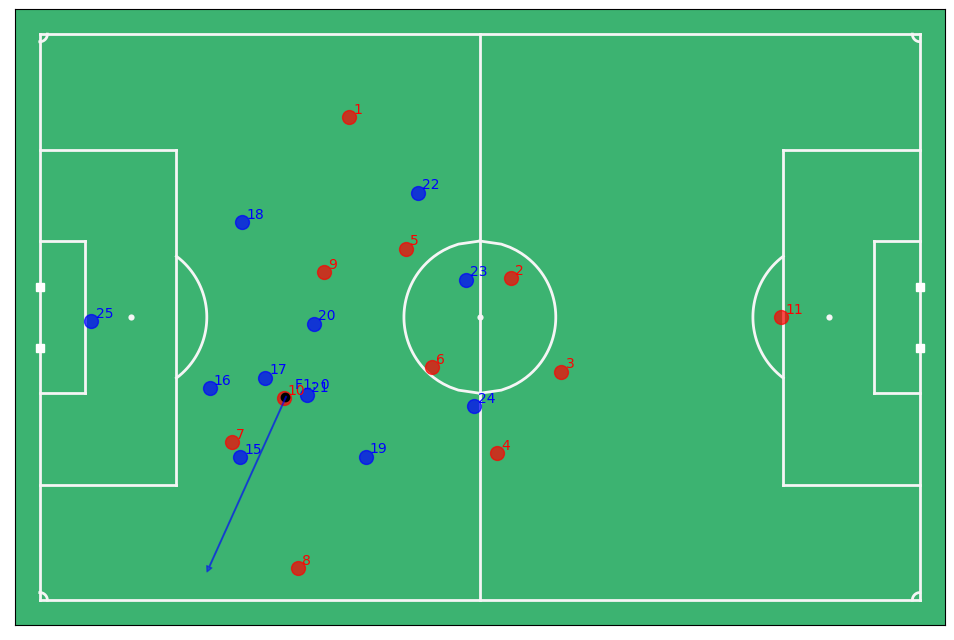

In [18]:
# We can also plot a single pass and all the positions of each team
pass_of_interest_loc = 161

pass_frame_number = passes.loc[pass_of_interest_loc]["Start Frame"]

fig, ax = mviz.plot_frame( tracking_home.loc[pass_frame_number], tracking_away.loc[pass_frame_number],annotate=True )
ax.annotate("", xy=passes.loc[pass_of_interest_loc][['End X', 'End Y']], xytext=passes.loc[pass_of_interest_loc][['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
textstring = 'F1: ' + str(passes.loc[pass_of_interest_loc]['nbr_crossed_ply'])
ax.text(passes.loc[pass_of_interest_loc]['Start X']+1, passes.loc[pass_of_interest_loc]['Start Y']+1,  textstring, fontsize=10, color='blue')



(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

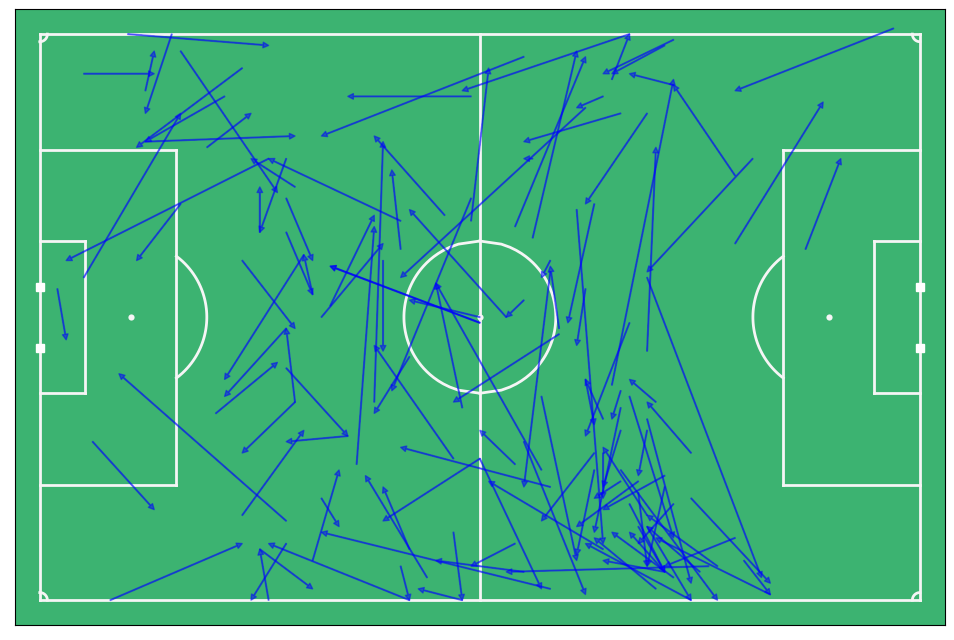

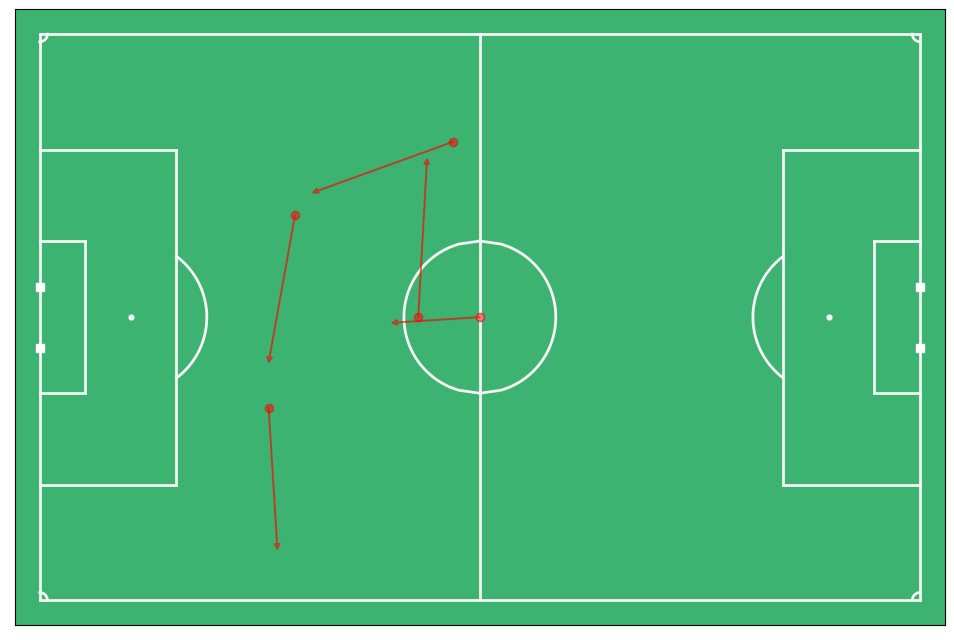

In [19]:
fig, ax= mviz.plot_pitch()


# Two ways to plot the first 4 passes:
for index, row in passes[passes["Type_of_Pass"]== 'defensive' ].iterrows():
       
    if ((row['Team'] == 'Home') & (row['Period'] == 2)):
        ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=True)
   # else:
    #    ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
     #             alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="red"), annotation_clip=False)
    
# That's essentially all that's in the plot_events function
mviz.plot_events( passes.sort_index().head(), indicators = ['Marker','Arrow'], annotate=False)

### Factor #3. Possession of the ball: quantify by its outcome

##### Possession is quantify by it’s outcome:

 - If a series leads to a goal/shot, then its corresponding score will be 1. 
 - If a series leads to a corner, free kick, or throw-in (the team with the ball must maintain possession), then its corresponding score will be 0.5.
 - If a series leads to a lost possession, then its corresponding score will be 0.1.
   


In [20]:
# detect all the series of passes that lead to a shot - 1 point
index = events[(events["Type"]=='SHOT')].index
passes['Possession_Outcome'] = ''
for i in np.array(index):
 
    while i > 1:
        i= i-1
        
        if events.iloc[i]['Type'] == 'PASS':
            passes.at[i, 'Possession_Outcome'] = 1
           
            
        else:
            break

# detect all the passes that lead to a set piece -0.5 point
index = events[(events["Type"]=='SET PIECE')].index

for i in np.array(index):
    j=i
    
    ind = True
    while j > 1:
        j= j-1
        
                
        if (events.iloc[j]['Type'] == 'PASS'):
                passes.at[j, 'Possession_Outcome'] = 0.5
                ind = False
                
        elif ((events.iloc[j]['Type'] != 'PASS') & (ind ==True)):
            if  (((events.iloc[i-1]['End Time [s]']-25) > events.iloc[j]['Start Time [s]'])):
                break
        else:
            break
            
passes['Possession_Outcome'] =np.where(passes['Possession_Outcome'] == '',0.1, passes['Possession_Outcome'] ) # 0.1 point for otherwise        
        

In [21]:
# Detect all assist passes and the previous one
index = events[(events["Type"]=='SHOT')].index
shift_index = np.array(index)-1
app = np.append(shift_index, shift_index-1)
idx = events.iloc[app].sort_index()[events['Type']=='PASS'].index
passes['playmaker'] = passes.index.isin(idx)

# Detect all the passes that lead to a ball lost

index = events[(events["Type"]=='BALL LOST')].index
shift_index = np.array(index)-1
idx = events.iloc[shift_index].sort_index()[events['Type']=='PASS'].index
passes['lead_to_ball_lost'] = passes.index.isin(idx)

#passes['Playmaker'] = passes.iloc[index]

### Factor #4. Expected Threat based on Origin and Destination zone

#### Origin and destination zone (difficulty of pass based on pitch area)
 - Pitch is divided into 96 zones will there respective weight (ie: based on xG score)
 - Quantify by: (xT in destination zone) - (xT in origin zone) =  xT_pass
 -	Positive score means ball moving closer to the goal
 
   Reference for the xThreat matrix:  Introducing Expected Threat (xT): https://karun.in/blog/expected-threat.html#visualizing-xt
 




In [22]:

import requests
#Import xT Grid, turn it into an array, and then get how many rows and columns it has

response = requests.get('https://karun.in/blog/data/open_xt_12x8_v1.json') #same data in the json file and csv file 
#xT = pd.read_csv(r"C:\Users\Michael\Documents\MACF courses material\Fall 2022\soccer_notebook_lab-master\xT\xT_Grid.csv", header=None)
xT = response.json()
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

<AxesSubplot: >

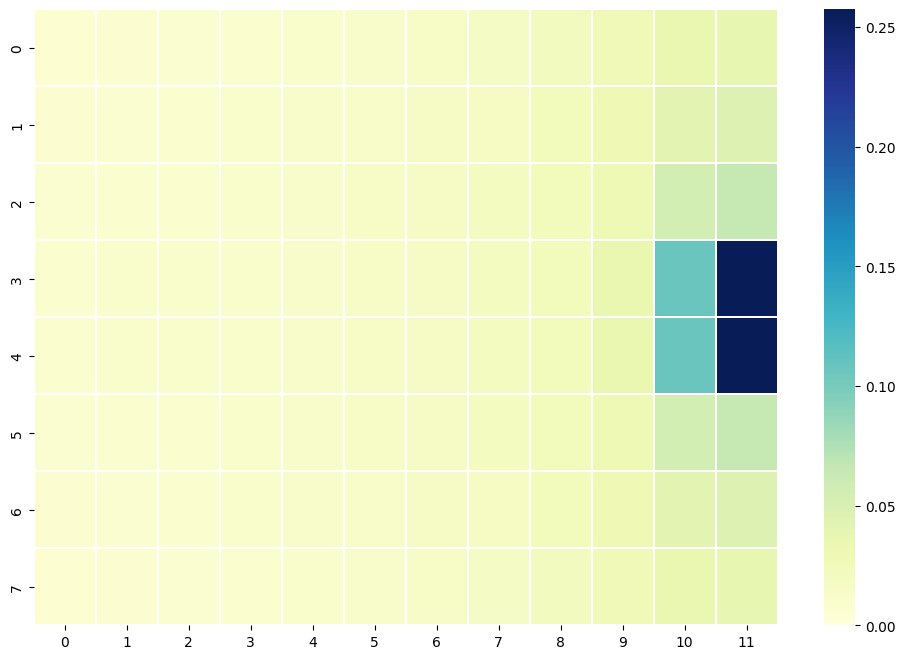

In [23]:
max = np.amax(xT)
fig ,ax = plt.subplots(figsize=(xT_cols, xT_rows))
ax.invert_yaxis()
sns.heatmap(xT , vmin=0, vmax=max, cmap="YlGnBu", linewidths=0.25, xticklabels=True,yticklabels=True)


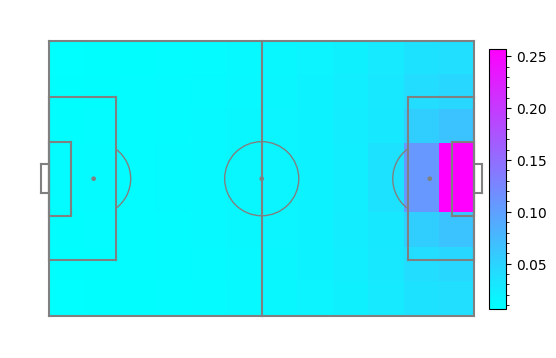

<AxesSubplot: >

In [24]:
mps.heatmap(xT,cmap="cool", linecolor="grey", cbar="True")


Text(-23.38, -28.240000000000002, '')

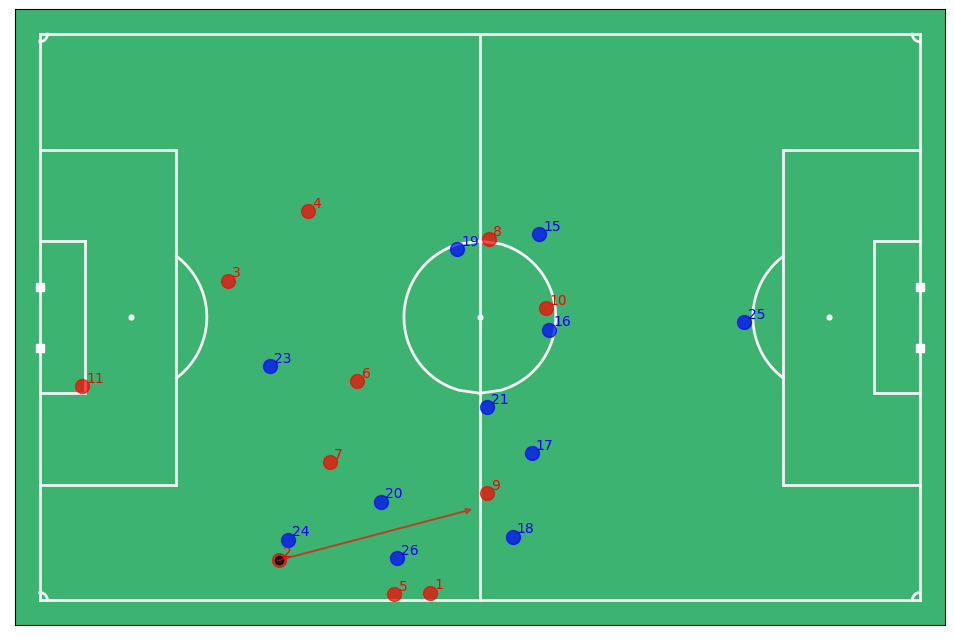

In [25]:
# We can also plot a single pass and all the positions of each team
pass_of_interest_loc = 1372


pass_frame_number = passes.loc[pass_of_interest_loc]["Start Frame"]

fig, ax = mviz.plot_frame( tracking_home.loc[pass_frame_number], tracking_away.loc[pass_frame_number],annotate=True )
ax.annotate("", xy=passes.loc[pass_of_interest_loc][['End X', 'End Y']], xytext=passes.loc[pass_of_interest_loc][['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="r"), annotation_clip=False)
textstring = ""#'F1: ' + str(passes.loc[pass_of_interest_loc]['nbr_crossed_ply'])
ax.text(passes.loc[pass_of_interest_loc]['Start X']+1, passes.loc[pass_of_interest_loc]['Start Y']+1,  textstring, fontsize=10, color='blue')

### xThreat: Identifying the Start and End bins for all the passes

In [26]:
#Bin Data for xT
df =pd.DataFrame()
# We use a pandas method called .cut --> https://pandas.pydata.org/docs/reference/api/pandas.cut.html
# We say labels=False because we want the integer locator of the bin
condition_1 = passes[(passes['Team'] == 'Away') & (passes['Period'] ==1) | (passes['Team'] == 'Home') & (passes['Period'] ==2)]

condition_1['x1_bin'] = pd.cut(condition_1['Start X'], bins=xT_cols, labels=False)
condition_1['y1_bin'] = pd.cut(condition_1['Start Y'], bins=xT_rows, labels=False)
condition_1['x2_bin'] = pd.cut(condition_1['End X'], bins=xT_cols, labels=False)
condition_1['y2_bin'] = pd.cut(condition_1['End Y'], bins=xT_rows, labels=False)


condition_2 = passes[(passes['Team'] == 'Away') & (passes['Period'] ==2) | (passes['Team'] == 'Home') & (passes['Period'] ==1)]

condition_2['x1_bin'] = pd.cut(-condition_2['Start X'], bins=xT_cols, labels=False)
condition_2['y1_bin'] = pd.cut(-condition_2['Start Y'], bins=xT_rows, labels=False)
condition_2['x2_bin'] = pd.cut(-condition_2['End X'], bins=xT_cols, labels=False)
condition_2['y2_bin'] = pd.cut(-condition_2['End Y'], bins=xT_rows, labels=False)

passes = condition_2.append(condition_1)

# reaganged format variable from [(X,Y), (X,Y), (X,Y)]to  [(X,X,X), (Y,Y,Y)]
passes['xThreat_Pass'] = xT[tuple(zip(*passes[['y2_bin', 'x2_bin']].values))] - xT[tuple(zip(*passes[['y1_bin', 'x1_bin']].values))] 

###  Improved Impact Function: Revised Weighted Sum

Revised Weighted Sum
The factors we computed in our methodology can be connected to create a general cumulative impact factor for each pass using the following formula. 

$$ Revised Weighted Sum=(1-w_i) * [1- \lambda * exp(-(x_p+x_r)^2)]+w_i * [1-0.8 exp(-2 *\mu)] $$
wi= weight associated with pass type.  for progressive (0.6), neutral (0.5), and defensive (0.4).
xp+xr= The sum of all  nearby opponents near the passer (xp) and recipient (xr).
$\lambda =1/(1+y) $, where y = possession outcome score . Refer to section 4.3 
$\mu = xTpass(speedpass/AvgSpeedi) $, where AvgSpeed_i= Average speed of the pass' type 

The first component of the sum describes the possessive value of a pass, and is measured using the possession outcome factor and the sum of all opponents within a 10 meter radius of the passer and receiver. The second component of the sum describes the attacking value of the pass, and uses the xThreat generated by the pass and the pass’ speed relative to its type’s average. Weighing each component by its pass type ensures that defensive/conservative passes are not being incorrectly judged. The nature of the formula allows for progressive passes to have more weight associated with its attacking value, while defensive passes have more weight with the pass’ progressive value. A couple of technical caveats to the formula ensure that its results are as intended.

- The coefficient 0.8 in the second component shifts the function upwards so that if  is negative, the attacking value can still take on a positive value (mainly applies to defensive passes). 
- Dividing the expression -(xp+xr) in the possessive value by 2 ensures that the sum of surrounding players doesn’t exceed a threshold that makes the exponential function insignificant.
- Each component is of the form 1-exp(-function) in order to maintain an output that is between 0 and 1. This form also supports the notion that defensive pressure does not linearly increase as the number of defenders increases. In reality, the pressure magnitude increases only slightly as more and more defenders are added to the mix. 


In [27]:

temp_df =pd.DataFrame()

for type_pass in ['progressive', 'neutral', 'defensive']:
    data_set = passes[passes['Type_of_Pass'] == type_pass]
    if (type_pass == 'progressive'):
        weight =0.6
    elif (type_pass == 'neutral'):
         weight =0.5
    elif (type_pass== 'defensive'):
         weight =0.4
    data_set['possession_score'] = (1- weight) * (1 - (1/(1+data_set['Possession_Outcome'])) * np.exp(-data_set['total_nbr_nerby_ply']/2))        
    data_set['scoring_score'] = (weight) *  (1 - 0.8* np.exp(-2 * data_set['xThreat_Pass'] *(data_set['velocity (m/s)']/data_set['velocity (m/s)'].mean())))
    data_set['Improved_Impact_Score'] = data_set['possession_score'] +data_set['scoring_score'] 
    
    temp_df = temp_df.append(data_set)
    
passes = temp_df

#### Distribution of the Improved Impact Score

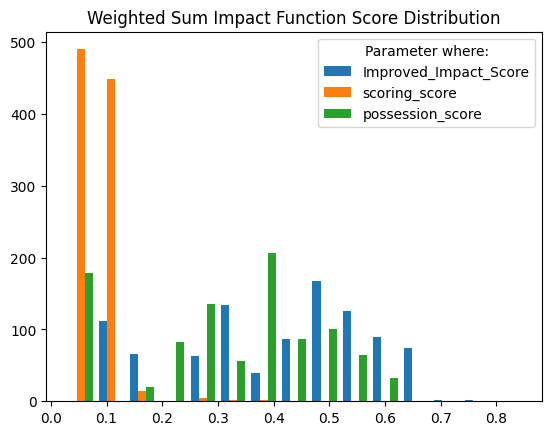

In [28]:
plt.hist(passes[['Improved_Impact_Score', 'scoring_score', 'possession_score' ]], 15, weights=None)
plt.legend(['Improved_Impact_Score', 'scoring_score', 'possession_score' ], title='Parameter where:')
plt.title('Weighted Sum Impact Function Score Distribution')
plt.show()

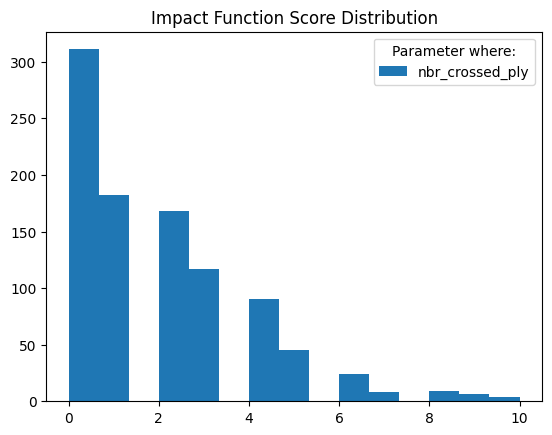

In [29]:
plt.hist(passes[['nbr_crossed_ply' ]], 15, weights=None)
plt.legend(['nbr_crossed_ply'], title='Parameter where:')
plt.title('Impact Function Score Distribution')
plt.show()

### Analyze the 3 different type of passes

(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

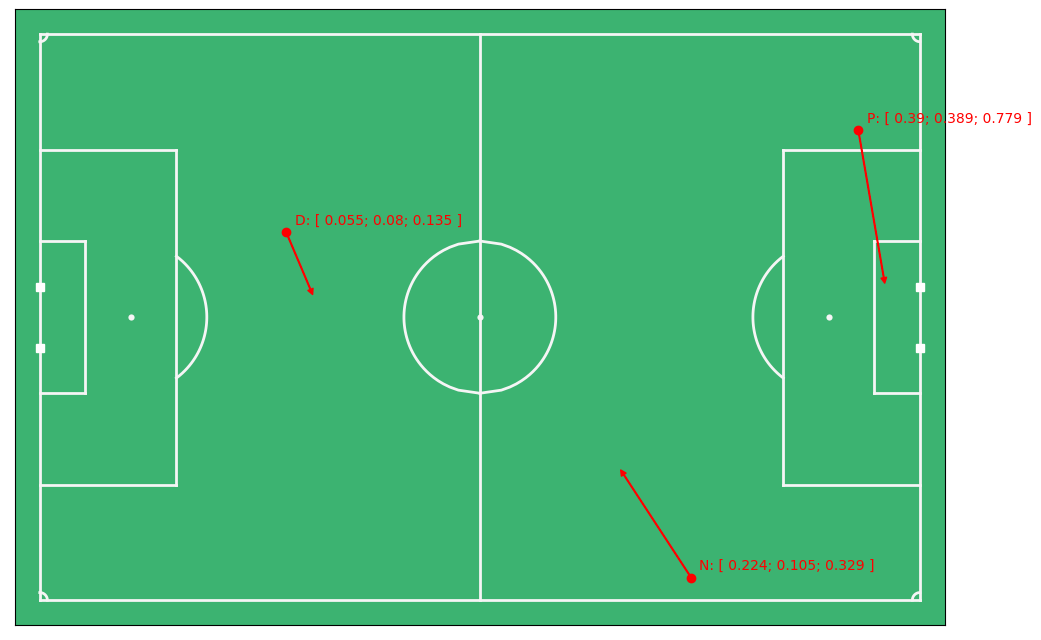

In [31]:
home_1 = passes[(passes["Team"]== 'Home') & (passes['Period'] ==2) ]#1807 def, 1365 neural, 1478 progre

mviz.plot_events( home_1.loc[[1807,1365,1478]], indicators = ['Marker','Arrow'], color ='r', annotate=True, alpha=1)


### Series of passes that lead to a goal with its respective  xThreat

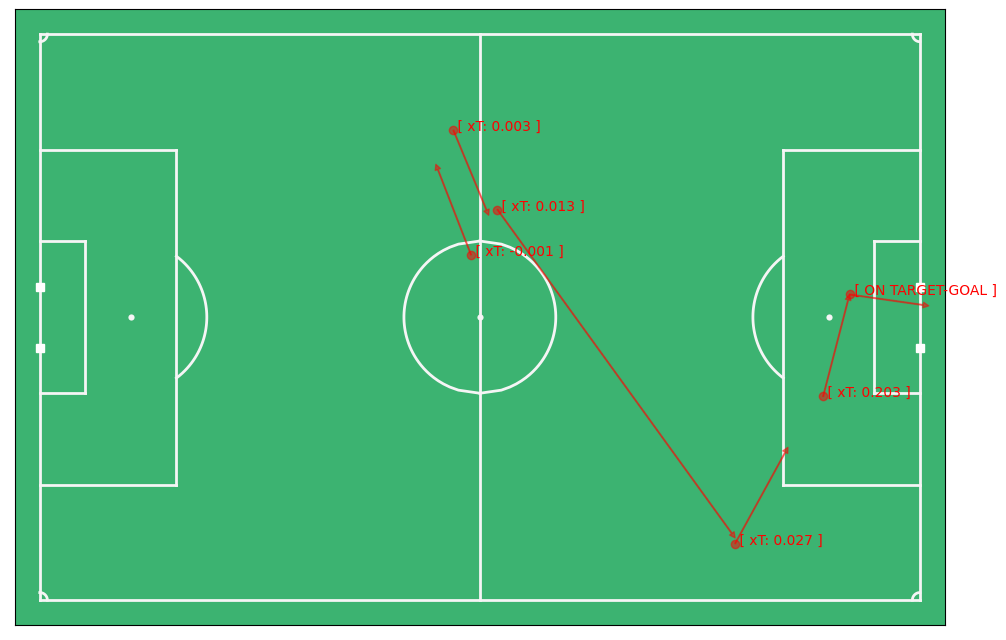

In [32]:
temp = events[818:824].merge(passes[['xThreat_Pass', 'Start Frame']], left_on = 'Start Frame', right_on ='Start Frame', how ="left")

fig, ax  =mviz.plot_events2(temp, indicators = ['Marker','Arrow'], annotate=True)
#textstring = 'kkk'#' [ ' + str(round(row['possession_score'], 3)) + '; ' + str(round(row['scoring_score'],3) )+ '; ' + str(round(row['Improved_Impact_Score'],3) ) + " ]"


In [36]:
passes

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,nbr_nerby_ply,total_nbr_nerby_ply,closest_opponent,Type_of_Pass,nbr_crossed_ply,velocity (m/s),Possession_Outcome,playmaker,lead_to_ball_lost,x1_bin,y1_bin,x2_bin,y2_bin,xThreat_Pass,possession_score,scoring_score,Improved_Impact_Score
29,Home,PASS,Normal,1,1489,59.56,1578,63.12,Player11,Player9,53.00,10.20,9.54,24.48,"[2, 0]",2,"[28.89895448423697, 0.3965271682999775]",progressive,4,12.849980,0.1,False,False,0,2,5,1,0.004966,0.266226,0.123564,0.389789
55,Home,PASS,Normal,1,2603,104.12,2708,108.32,Player3,Player1,29.68,-20.40,3.18,29.92,"[0, 0]",0,"[16.083279470406527, 16.2457624684839]",progressive,3,13.540802,0.1,False,False,2,6,5,0,0.003060,0.036364,0.122317,0.158681
58,Home,PASS,Normal,1,2906,116.24,2923,116.92,Player6,Player10,-2.12,8.84,-18.02,6.12,"[2, 0]",2,"[16.169967601760987, 2.5309519884818004]",progressive,5,23.722024,0.1,False,False,6,2,8,3,0.006996,0.266226,0.129213,0.395439
79,Home,PASS,Normal,1,4261,170.44,4291,171.64,Player5,Player9,-25.44,13.60,-36.04,14.96,"[2, 0]",2,"[12.186001855243584, 3.3076978096555307]",progressive,0,8.905741,1,False,False,8,2,10,2,0.030789,0.326424,0.135128,0.461552
81,Home,PASS,Normal,1,4361,174.44,4376,175.04,Player1,Player9,-40.28,27.20,-45.58,17.68,"[1, 1]",2,"[4.406392485287709, 5.786494330801681]",progressive,2,18.159815,1,True,False,10,0,11,1,0.011626,0.326424,0.131691,0.458115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,Home,PASS,Normal,2,137023,5480.92,137053,5482.12,Player7,Player13,4.24,-17.68,0.00,-13.60,"[0, 2]",2,"[6.481889788634173, 11.651337854787322]",defensive,1,4.903513,0.1,False,False,6,1,6,2,0.000738,0.399338,0.080209,0.479548
1912,Home,PASS,Normal,2,137116,5484.64,137130,5485.20,Player12,Player5,5.30,2.04,3.18,-0.00,"[2, 1]",3,"[4.3351732232057385, 6.989980956569202]",defensive,1,5.253764,0.5,False,False,6,4,6,4,0.000000,0.510748,0.080000,0.590748
1913,Home,PASS,Normal,2,137130,5485.20,137176,5487.04,Player5,Player1,3.18,-0.00,-8.48,12.92,"[3, 2]",5,"[6.989980956569202, 5.767049817471666]",defensive,0,9.458427,0.5,False,False,6,3,5,5,-0.002604,0.567166,0.078573,0.645739
1915,Home,PASS,Normal,2,137263,5490.52,137303,5492.12,Player6,Player1,-4.24,12.24,-12.72,21.76,"[0, 3]",3,"[3.468117435670247, 16.8165319875532]",defensive,0,7.968218,0.5,False,False,5,5,4,6,-0.002144,0.510748,0.079011,0.589759
